# Image To Text

In [1]:
import pytesseract as tess
import cv2

In [2]:
image=cv2.imread('Data/sample_mgh.JPG')
base_image=image.copy()

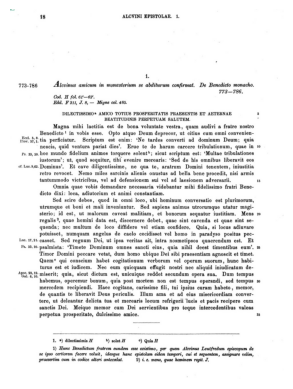

In [6]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(base_image)

In [3]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# aplying gaussian blur
gray_image_blur=cv2.GaussianBlur(gray_image,(7,7),0)

# thresholding the image
thresh=cv2.threshold(gray_image_blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1] # 1 is used to get the second element of the tuple


In [4]:
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)) # 3,3 is the size of the kernel, getStructuringElement is used to get the kernel
dilate=cv2.dilate(thresh,kernel,iterations=4) # iterations is the number of times the kernel is applied to the image,dilate is used to increase the white region in the image


In [7]:
cv2.imwrite('Data/dilate_image.png',dilate)

True

In [9]:
# finding contours
contours=cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0] # 0 is used to get the first element of the tuple
contours=contours[0] if len(contours)==2 else contours[1] # if the length of the contours is 2 then the first element is the contour else the second element is the contour 
contours=sorted(contours,key=lambda x:cv2.boundingRect(x)[1]) # sorting the contours from top to bottom

In [10]:
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if h > 200 and w > 250:
        roi = base_image[y:y+h, x:x+w]
        cv2.rectangle(image, (x,y), (x+w, y+h), (36, 255, 12), 2)

cv2.imwrite("Data/sample_boxes.png", image)

True

In [12]:
result=tess.image_to_string(base_image)
print(result)

18 ALCVINI EPISTOLAE. 1.

1,

773-786 Alevinus amicum in monasterium se abditurum confirmat. De Benedicto monacho.
773—786.
Cod. H fol. 61'—62'.
Edd. F211, J. 8, — Migne col. 485.

DILECTISSIMO* AMICO TOTIUS PROSPERITATIS PRAESENTIS ET AETERNAE
BEATITUDINIS PERPETUAM SALUTEM.
Magna mihi laetitia est de bona voluntate vestra, quam audivi a fratre nostro
Benedicto! in vobis esse. Opto atque Deum deprecor, ut citius cum omni convenien-
Pont tia perficiatur. Scriptum est enim: ‘Ne tardes converti ad dominum Deum; quia
nescis, quid ventura pariat dies’, Erue te de harum carcere tribulationum, quae in
Ps. 33, 20.hoe mundo fidelium animos torquere solent®; sicut scriptum est: ‘Multae tribulationes
iustorum’; ut, quod sequitur, tibi evenire merearis: ‘Sed de his omnibus liberavit eos
cf. Luc.9,62. Dominus’. Et cave diligentissime, ne qua te, aratrum Domini tenentem, iniustitia
retro revocet. Nemo miles sarcinis alienis onustus ad bella bene procedit, nisi armis
tantummodo victricibus, vel ad d